<h1><center>Basic Descriptive Statistic Functions in Python (Self-Computed vs. Pre-programmed)</center></h1>

<h1><center>Standard Deviation Formula</center></h1>

\begin{equation*}
s = \sqrt \frac{\sum_{k=1}^n\left(x-\overline{x}\right)^2}{n-1} 
\end{equation*}

My computed mean: 34.61538461538461
numpy mean: 34.61538461538461
My computed median 30
numpy median: 30.0
My computed mode= 30 ,count= 4
scipy mode: ModeResult(mode=array([30]), count=array([4]))
My computed variance: 178.69822485207098
numpy variance: 178.69822485207098
My computed standard deviation: 13.367805536140589
numpy standard deviation: 13.367805536140589


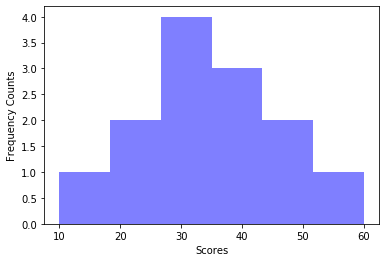

In [27]:
# Compare Numpy and Scipy statistical functions and my own functions 
import numpy as np
import pandas as pd
from scipy import stats
from matplotlib import pyplot as plt

def round(x):
    pos = str(x).find(".")+1
    val = str(x)[pos:pos+1]
    if (int(val) >= 5):
        return(str(x+1)[0:pos-1])
    else:
        return(str(x)[0:pos-1])

def average_calc(list):
    total = 0
    counter = 0
    for i in list:
        total = total + i
        # print(counter,i)
        counter = counter + 1
    # print ("total:",total)
    # print("no. of items:",counter)
    return total/counter

def median_calc(list):
    sorted_list = sorted(list)
    # print("sorted list:",sorted_list)
    result = 0
    position = int(round(len(sorted_list) / 2))
    if len(sorted_list) % 2 == 0:
        # print("even")
        result = (sorted_list[position-1] + sorted_list[position]) / 2 
    else:
        # print("odd")
        result = sorted_list[position-1]    
    return(result)

def mode_calc(list):
    list = sorted(list)
    list_count = []
    mode_result = []
    highest_count = 0
    for i in list:
        if list.count(i) >= highest_count:  
                list_count = i
                highest_count = list.count(i)
    mode_result.append(list_count) 
    mode_result.append(highest_count)
    return(mode_result)

def variance_calc(list):
  average = average_calc(list)
  variance = 0
  for item in list:
    # print("variance=",variance)
    # print("average=",average)
    # print("item=",item)
    variance = variance + (average - item)**2
  return variance/len(list)

def std_deviation_calc(variance):
  return variance ** 0.5


average = 0
media = 0
mode = 0
list = [60,30,20,30,40,40,50,20,40,50,10,30,30,]

average = average_calc(list)
print("My computed mean:",average)
print("numpy mean:",np.mean(list))
median = median_calc(list)
print("My computed median",median)
print("numpy median:",np.median(list))
mode = mode_calc(list)
print("My computed mode=",mode[0],",count=",mode[1])
print("scipy mode:",stats.mode(list))
variance = variance_calc(list)
print("My computed variance:",variance)
print("numpy variance:",np.var(list))
std_deviation = std_deviation_calc(variance)
print("My computed standard deviation:",std_deviation)
print("numpy standard deviation:",np.std(list))
num_bins = 6
# Display histogram showing the distribution of 
n, bins, patches = plt.hist(list, num_bins, facecolor='blue', alpha=0.5)
plt.xlabel('Scores')
plt.ylabel('Frequency Counts')
plt.show()

<h1><center>Understanding the Python Enumerate Function</center></h1>

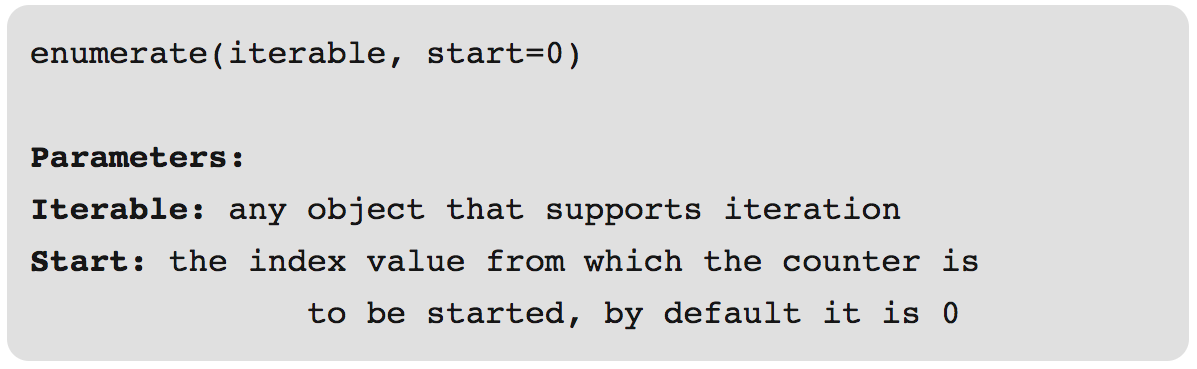

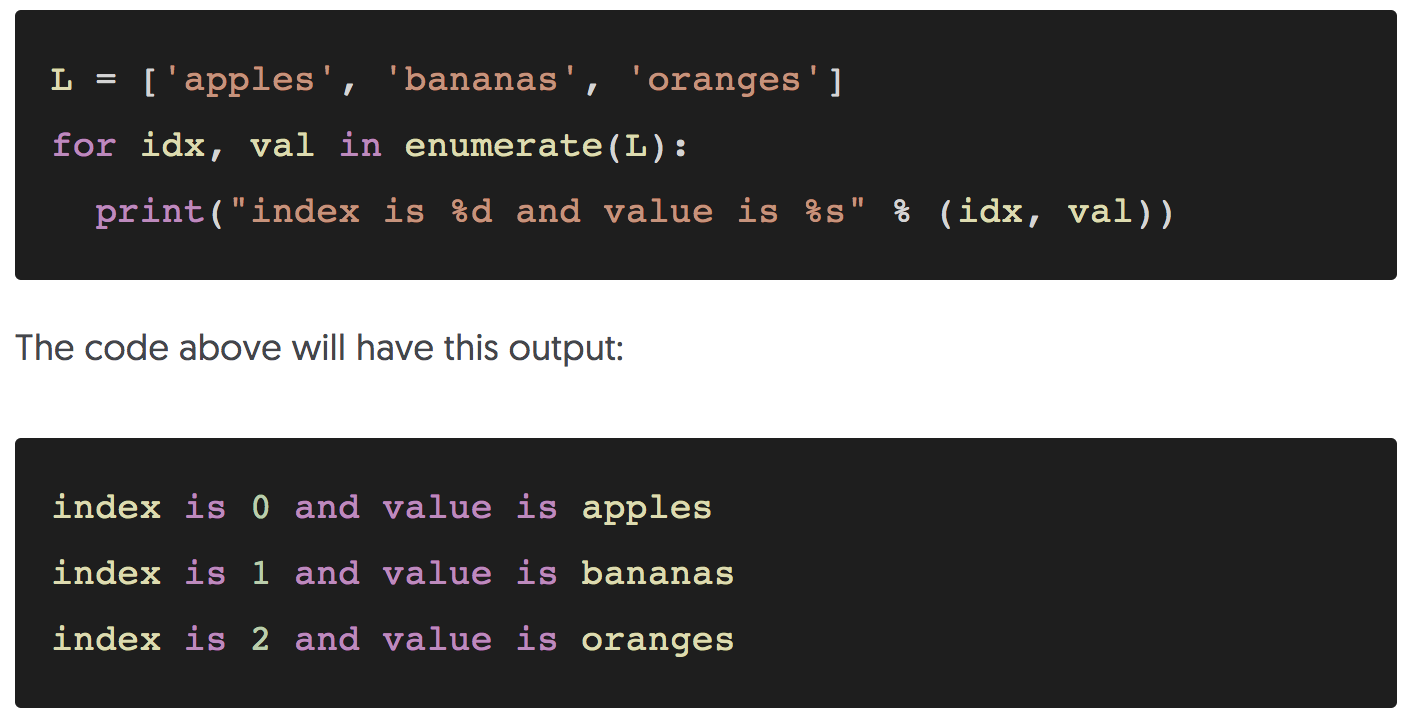

<h1><center>Presenting China Pollution Figures Using Beautiful Soup, Pandas and Matplotlib</center></h1>

Air Quality Ranking

    Rank          City Province belongs to  AQI    Air Quality Level PM 2.5  \
0      1         Sanya              Hainan   22            Excellent     10   
1      2       Lijiang              Yunnan   24            Excellent     12   
2      3          Dali              Yunnan   24            Excellent     15   
3      4      Changsha               Hunan   25            Excellent     17   
4      5        Haikou              Hainan   28            Excellent     15   
5      6       Qingdao            Shandong   29            Excellent     19   
6      7       Kunming              Yunnan   33            Excellent     23   
7      8         Lhasa               Tibet   34            Excellent     15   
8      9        Dalian           Liaoning    43            Excellent     20   
9     10     Guangzhou           Guangdong   44            Excellent     30   
10    11       Guiyang             Guizhou   45            Excellent     31   
11    12   Zhangjiakou         

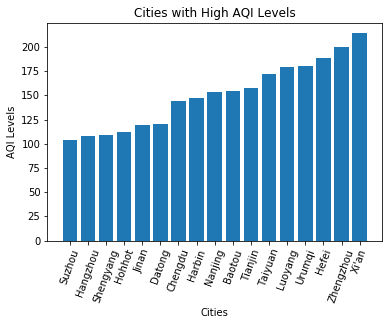

In [39]:
from bs4 import BeautifulSoup
import requests
import csv
import pandas as pd
import matplotlib.pyplot as plt

# Fetch URL
html_page = requests.get('https://www.travelchinaguide.com/climate/air-pollution.htm') 
# Obtain the entire HTML page
soup = BeautifulSoup(html_page.content,'html.parser')
# Find all the HTML tables 
tables = soup.find_all(class_="c_tableX")
# Access the second HTML table (i.e. tables[1] instrad of tablrs[0]) that contains Air Quality information 
# with both table header and table data
table = tables[1] # assign 2nd table in the table list to variable called "table"
table_header = table.find_all('th') # extract table header based on the 'th' tag
# print table header tags and texts
# print(table_header) 
header = []
data = []
for th in table.find_all('th'):
    # print header text
    # print(th.text)
    header.append(th.text)
# print list of headers
# print(header)
all_rows = table.find_all("tr") # extract all the table rows
# Enumerate all the rows to extract needed data
# Obtain both index and values using the enumerate function starting at 2nd row
for i, row in enumerate(all_rows,1):
        if (i < len(all_rows)): # i will start at 0 and stop when i equals the number of rows already processed
            # for each row find all the "td" (i.e. table column) element that holds the data
            tds = all_rows[i].find_all("td") 
             # enumerate each column to extract the "td" value
            for j, td in enumerate(tds,1):
                # print the column name and value
                # print (j,td.text)
                if j==1:
                    rank = td.text
                if j==2:
                    city = td.text
                if j==3:
                    province = td.text
                if j==4:
                    aqi = td.text
                if j==5:
                    air_quality = td.text
                if j==6:
                    pm2_5 = td.text
                if j==7:
                    pm10 = td.text
            # append the all the column values to the data list
            data.append([rank,city,province,aqi,air_quality,pm2_5,pm10])
# Assign row data and column headers to dataframe         
df = pd.DataFrame(data,
  columns = header
)
# Display data frame with both header and data
# df 
# Save dataframe to external csv file
df.to_csv('projects/china_air_quality.csv', sep='\t', encoding='utf-8')
# open csv file and read csv data into Pandas dataframe
df = pd.read_csv("projects/china_air_quality.csv",sep='\t', encoding='utf-8')
df
# Set column headings for entire air quality table and print out the entire table
air_quality_ranking = df[['Rank','City','Province belongs to','AQI','Air Quality Level','PM 2.5','PM 10']]
# air_quality_ranking = pd.DataFrame(df.values[1:], columns=df.values[0])
print("Air Quality Ranking\n")
print(air_quality_ranking)
# Extract cities that are polluted
lightly_polluted    = df[df['Air Quality Level'] == 'Lightly Polluted']
moderately_polluted = df[df['Air Quality Level'] == 'Moderately Polluted']
heavily_polluted    = df[df['Air Quality Level'] == 'Heavely Polluted']
# Combine the cities of different pollution level into one table
selected = lightly_polluted.append(moderately_polluted).append(heavily_polluted)
pc = selected[['Rank','City','AQI','Air Quality Level','PM 2.5','PM 10']]
# ////////////////////////////////////////////////////////////////////
# Display Cities with Pollution
# ////////////////////////////////////////////////////////////////////
print("\nCities with Pollution\n")
print(pc)
cities = pc['City'].tolist()
aqi_lvl = pc['AQI'].tolist()
pm_2_5 = pc['PM 2.5'].tolist()
ax = plt.subplot()
plt.bar(range(len(cities)),aqi_lvl)
# Create ax object here
j = 0
ax_list = []
while j<len(cities):
    ax_list.append(j)
    j += 1
ax.set_xticks(ax_list)
plt.xlabel('Cities')
plt.ylabel('AQI Levels')
plt.title('Cities with High AQI Levels')
ax.set_xticklabels(cities, rotation=70)
plt.show()

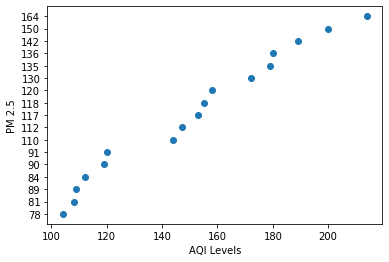

In [42]:
from matplotlib import pyplot as plt
# aqi_lvl = pc['AQI'].tolist()
# pm_2_5 = pc['PM 2.5'].tolist()
ax = plt.subplot()
plt.plot(aqi_lvl, pm_2_5, 'o')
plt.ylabel('PM 2.5')
plt.xlabel('AQI Levels')
plt.show()